In [95]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import random

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df = pd.read_csv('/content/drive/MyDrive/data/TextblobSentimentforAmazon.csv')
df

,Unnamed: 0.1,Unnamed: 0,reviewText,summary,polarity,subjectivity,sentiment,label
0,0,7,worked first week charge phone waste money,not a good Idea,0.025000,0.166667,Negative,Positive
1,1,19,worked great first couple week stopped complet...,Horrible,0.140000,0.376667,Negative,Positive
2,2,23,nothing special sure nice tell powered led glo...,I like the fact they light up.,0.511429,0.817063,Negative,Positive
3,3,26,disappointed work ipad get buying cheap adapter,This doesn't work with my iPad.,-0.175000,0.725000,Negative,Negative
4,4,32,work one side time connect two cable one side ...,"don't waste your money, pay more and buy one a...",-0.150000,0.683333,Negative,Negative
...,...,...,...,...,...,...,...,...
11137,11137,6548,sync iphone without problem bt link short dist...,Works but sound quality is OK,0.304545,0.548990,Positive,Positive
11138,11138,6549,spent hour researching would best car speakerp...,A little bluetooth helper in your car,0.164194,0.492933,Positive,Positive
11139,11139,6550,purchased primarily pair new ipad secondarily ...,Pairs perfectly with iPad,0.289282,0.649713,Positive,Positive
11140,11140,6551,great bluetooth product paired iphone ipad len...,Great Product,0.459226,0.620337,Positive,Positive


In [98]:
df['label'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [99]:
df = df[df['label'] != 'Neutral']

# Now df contains only rows where label is not 'Neutral'
# If you want to reset the index after filtering
df.reset_index(drop=True, inplace=True)

In [100]:
df['label'].unique()

array(['Positive', 'Negative'], dtype=object)

In [101]:
df1 = df.copy()

In [102]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
reviewText      0
summary         0
polarity        0
subjectivity    0
sentiment       0
label           0
dtype: int64

In [103]:
df1

,Unnamed: 0.1,Unnamed: 0,reviewText,summary,polarity,subjectivity,sentiment,label
0,0,7,worked first week charge phone waste money,not a good Idea,0.025000,0.166667,Negative,Positive
1,1,19,worked great first couple week stopped complet...,Horrible,0.140000,0.376667,Negative,Positive
2,2,23,nothing special sure nice tell powered led glo...,I like the fact they light up.,0.511429,0.817063,Negative,Positive
3,3,26,disappointed work ipad get buying cheap adapter,This doesn't work with my iPad.,-0.175000,0.725000,Negative,Negative
4,4,32,work one side time connect two cable one side ...,"don't waste your money, pay more and buy one a...",-0.150000,0.683333,Negative,Negative
...,...,...,...,...,...,...,...,...
10653,11137,6548,sync iphone without problem bt link short dist...,Works but sound quality is OK,0.304545,0.548990,Positive,Positive
10654,11138,6549,spent hour researching would best car speakerp...,A little bluetooth helper in your car,0.164194,0.492933,Positive,Positive
10655,11139,6550,purchased primarily pair new ipad secondarily ...,Pairs perfectly with iPad,0.289282,0.649713,Positive,Positive
10656,11140,6551,great bluetooth product paired iphone ipad len...,Great Product,0.459226,0.620337,Positive,Positive


In [104]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
# Download the 'stopwords' resource
nltk.download('stopwords')

# Download the 'wordnet' resource for lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [106]:
df['reviewText'] = df['reviewText'].str.lower()

In [107]:
import re

In [108]:
def remove_html_tags(text):
    if isinstance(text, str):
        pattern = re.compile('<.*?>')           #?ISinstance
        return pattern.sub(r'', text)
    else:
        return text

In [109]:
df['reviewText'] = df['reviewText'].apply(remove_html_tags)

In [110]:

def remove_url(text):
    if isinstance(text, str):
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'', text)
    else:
        return text

In [111]:
df['reviewText'] = df['reviewText'].apply(remove_url)

In [112]:
import string

In [113]:
import time

In [114]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [115]:
exclude = string.punctuation

In [116]:
def remove_punc(text):
    if isinstance(text, str):
        for char in exclude:
            text = text.replace(char, '')
        return text
    else:
        return str(text)

In [117]:
df['reviewText'] = df['reviewText'].apply(remove_punc)

In [118]:
df['reviewText'][12]

'phone charger go bad two week say purchased charger cell phone cheaply made one ok guess'

In [119]:
def DataPrep(text):
    if not isinstance(text, (str, bytes)):
        # Handle non-string or non-bytes-like objects here
        return text  # or return some default value, or raise an exception

    # Remove non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)

    # Other data preparation steps
    text = re.sub(r'\d+', '', text)  # numbers
    text = re.sub(r'[^\w\s]', '', text)  # special characters

    # tokenization
    tokens = nltk.word_tokenize(text)

    # remove puncs
    punc = list(punctuation)
    words = [word for word in tokens if word not in punc]

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if not word in stop_words]

    # lemmatization
    words = [lemma.lemmatize(word) for word in words]

    text = ' '.join(words)

    return text

In [120]:
df['reviewText'] = df['reviewText'].apply(DataPrep)

In [121]:
# print(f'There are around {int(df["cleaned_reviews"].duplicated().sum())} duplicated reviews, we will remove them.')

In [122]:
df

,Unnamed: 0.1,Unnamed: 0,reviewText,summary,polarity,subjectivity,sentiment,label
0,0,7,worked first week charge phone waste money,not a good Idea,0.025000,0.166667,Negative,Positive
1,1,19,worked great first couple week stopped complet...,Horrible,0.140000,0.376667,Negative,Positive
2,2,23,nothing special sure nice tell powered led glo...,I like the fact they light up.,0.511429,0.817063,Negative,Positive
3,3,26,disappointed work ipad get buying cheap adapter,This doesn't work with my iPad.,-0.175000,0.725000,Negative,Negative
4,4,32,work one side time connect two cable one side ...,"don't waste your money, pay more and buy one a...",-0.150000,0.683333,Negative,Negative
...,...,...,...,...,...,...,...,...
10653,11137,6548,sync iphone without problem bt link short dist...,Works but sound quality is OK,0.304545,0.548990,Positive,Positive
10654,11138,6549,spent hour researching would best car speakerp...,A little bluetooth helper in your car,0.164194,0.492933,Positive,Positive
10655,11139,6550,purchased primarily pair new ipad secondarily ...,Pairs perfectly with iPad,0.289282,0.649713,Positive,Positive
10656,11140,6551,great bluetooth product paired iphone ipad len...,Great Product,0.459226,0.620337,Positive,Positive


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  10658 non-null  int64  
 1   Unnamed: 0    10658 non-null  int64  
 2   reviewText    10658 non-null  object 
 3   summary       10658 non-null  object 
 4   polarity      10658 non-null  float64
 5   subjectivity  10658 non-null  float64
 6   sentiment     10658 non-null  object 
 7   label         10658 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 666.2+ KB


In [124]:
df

,Unnamed: 0.1,Unnamed: 0,reviewText,summary,polarity,subjectivity,sentiment,label
0,0,7,worked first week charge phone waste money,not a good Idea,0.025000,0.166667,Negative,Positive
1,1,19,worked great first couple week stopped complet...,Horrible,0.140000,0.376667,Negative,Positive
2,2,23,nothing special sure nice tell powered led glo...,I like the fact they light up.,0.511429,0.817063,Negative,Positive
3,3,26,disappointed work ipad get buying cheap adapter,This doesn't work with my iPad.,-0.175000,0.725000,Negative,Negative
4,4,32,work one side time connect two cable one side ...,"don't waste your money, pay more and buy one a...",-0.150000,0.683333,Negative,Negative
...,...,...,...,...,...,...,...,...
10653,11137,6548,sync iphone without problem bt link short dist...,Works but sound quality is OK,0.304545,0.548990,Positive,Positive
10654,11138,6549,spent hour researching would best car speakerp...,A little bluetooth helper in your car,0.164194,0.492933,Positive,Positive
10655,11139,6550,purchased primarily pair new ipad secondarily ...,Pairs perfectly with iPad,0.289282,0.649713,Positive,Positive
10656,11140,6551,great bluetooth product paired iphone ipad len...,Great Product,0.459226,0.620337,Positive,Positive


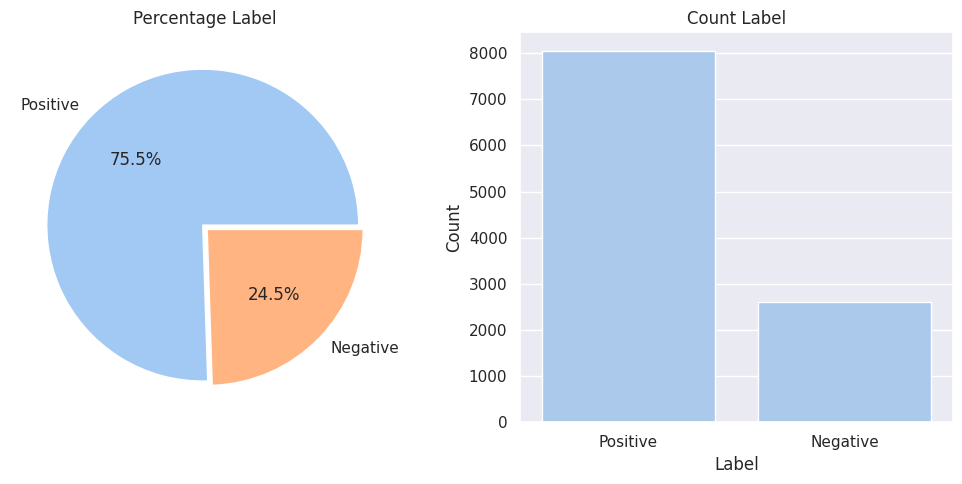

In [125]:
label_count = df['label'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

sns.countplot(x = df['label'] , ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [126]:
x_train , x_test , y_train , y_test = train_test_split(df['reviewText'] , df['label'] , train_size = 0.80 , random_state = 42)

In [127]:
len(x_train) , len(x_test)

(8526, 2132)

In [128]:
x_train

7640    got son nokia work fine igo charger anywhere u...
3035    screen protector cheap pa received day earlier...
4055    one came original htc broke year bought anothe...
2483    dont like stick simple case rubber loose cant ...
6723    fishing used identical brand name dry pak loan...
                              ...                        
5734    pro sunit great range comfortable ear wear day...
5191    bought little skeptical tried bought two work ...
5390    like long cord changer able reach night stand ...
860     bought gift dead arrival maybe bad one trouble...
7270    shame motorola build great phone driver motoro...
Name: reviewText, Length: 8526, dtype: object

In [129]:
vec = TfidfVectorizer()
vec.fit(x_train)
# print("No. of feature words: ",len(vec.get_feature_names()))

TfidfVectorizer()

In [130]:
x_train = vec.transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

In [131]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
x_train.shape , x_test.shape

((8526, 14635), (2132, 14635))

In [133]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Logistic Regression

In [134]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [135]:
ytrn_prd4 = lr.predict(x_train)

In [136]:
ytst_Prd4 = lr.predict(x_test)

In [137]:
trn_acc4 = accuracy_score(ytrn_prd4,y_train)*100
trn_acc4

91.61388693408398

In [138]:
tst_acc4 = accuracy_score(ytst_Prd4,y_test)*100
tst_acc4

88.18011257035647

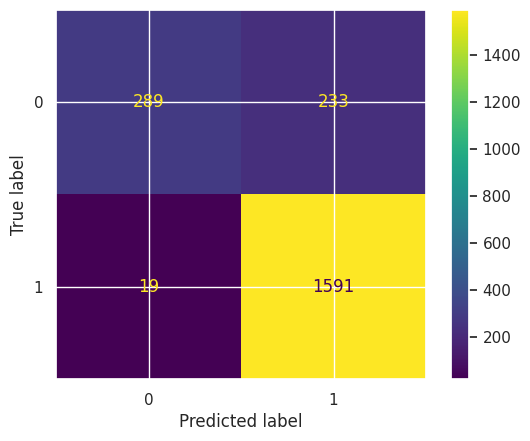

In [139]:
cm4 = confusion_matrix(y_test,ytst_Prd4)
cm_disp4 = ConfusionMatrixDisplay(confusion_matrix = cm4)
cm_disp4.plot()
plt.show()

In [140]:
print(classification_report(y_test,ytst_Prd4))

              precision    recall  f1-score   support

    Negative       0.94      0.55      0.70       522
    Positive       0.87      0.99      0.93      1610

    accuracy                           0.88      2132
   macro avg       0.91      0.77      0.81      2132
weighted avg       0.89      0.88      0.87      2132



Random Forest Classifier


In [141]:
rnd = RandomForestClassifier()

In [142]:
rnd.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
ytrn_prd1 = rnd.predict(x_train)

In [144]:
ytst_Prd1 = rnd.predict(x_test)

In [145]:
trn_acc1 = accuracy_score(ytrn_prd1,y_train)*100
trn_acc1

100.0

In [146]:

tst_acc1 = accuracy_score(ytst_Prd1,y_test)*100
tst_acc1

84.56848030018762

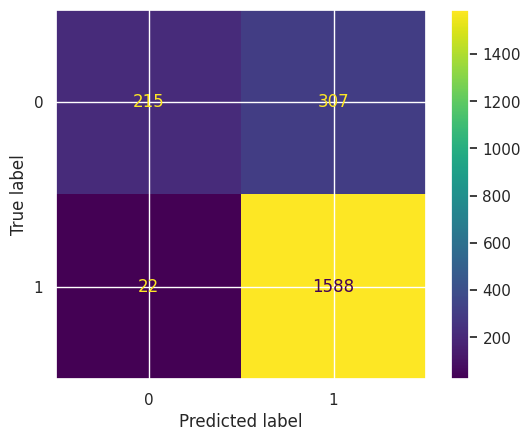

In [147]:


cm = confusion_matrix(y_test,ytst_Prd1)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()


In [148]:
print(classification_report(y_test,ytst_Prd1))

              precision    recall  f1-score   support

    Negative       0.91      0.41      0.57       522
    Positive       0.84      0.99      0.91      1610

    accuracy                           0.85      2132
   macro avg       0.87      0.70      0.74      2132
weighted avg       0.85      0.85      0.82      2132



In [149]:
from sklearn.naive_bayes import MultinomialNB

In [150]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [151]:
y_train_pred = nb_classifier.predict(x_train)
y_test_pred = nb_classifier.predict(x_test)

In [152]:
train_accuracy = accuracy_score(y_train_pred, y_train) * 100

In [153]:
train_accuracy

76.12010321369928

In [154]:
test_accuracy = accuracy_score(y_test_pred, y_test) * 100

In [155]:
test_accuracy

75.84427767354597

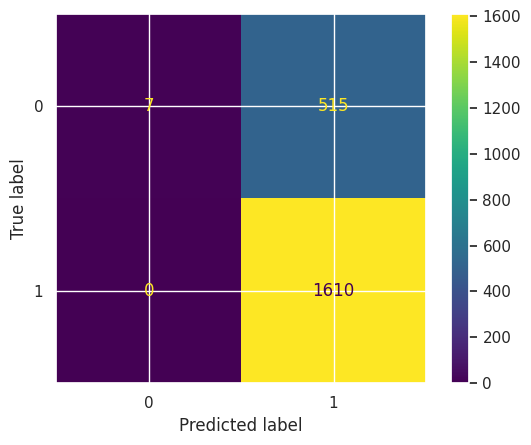

In [156]:
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [157]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       1.00      0.01      0.03       522
    Positive       0.76      1.00      0.86      1610

    accuracy                           0.76      2132
   macro avg       0.88      0.51      0.44      2132
weighted avg       0.82      0.76      0.66      2132



SVM

In [158]:
from sklearn.svm import SVC

In [159]:
sv = SVC(probability = True)

In [160]:
y_train_numeric = pd.Series(y_train).map({'Positive': 1, 'Negative': 0})

In [ ]:
sv.fit(x_train,y_train_numeric)

In [ ]:
ytrn_prd10 = sv.predict(x_train)

In [ ]:
ytst_prd10 = sv.predict(x_test)

In [ ]:
ytst_prd10

In [ ]:
trn_acc10 = accuracy_score(ytrn_prd10,y_train_numeric)*100
trn_acc10

In [ ]:
tst_acc10 = accuracy_score(ytst_prd10,y_test)*100
tst_acc10

In [ ]:
cm10 = confusion_matrix(y_test,ytst_prd10)
cm_disp10 = ConfusionMatrixDisplay(confusion_matrix = cm10)
cm_disp10.plot()
plt.show()

In [ ]:
print(classification_report(y_test, ytst_prd10))

In [ ]:
train_scores=[trn_acc4,trn_acc1,trn_acc10,train_accuracy] #trn_acc10
test_scores=[tst_acc4,tst_acc1,trn_acc10,test_accuracy] #tst_acc10

models = ['Logistic Regression','RandomForest','SVC','MultinominalNB']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, train_scores, width, label='Train Accuracy')

rects2 = ax.bar(x + width, test_scores, width, label='Test Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('TextBlob Comparison of Training and Test Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
score1 = sv.predict_proba(x_test)[:,1]

In [ ]:
y_test

In [ ]:
y_test_numeric = pd.Series(y_test).map({'Positive': 1, 'Negative': 0})

In [ ]:
score1

In [ ]:
x_test

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_numeric, score1)

In [ ]:
thresholds

In [ ]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)